c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 

Pilota analizzato: HAM (P7.0)
Pilota davanti: VER (P6.0)
Pilota dietro: TSU (P8.0)


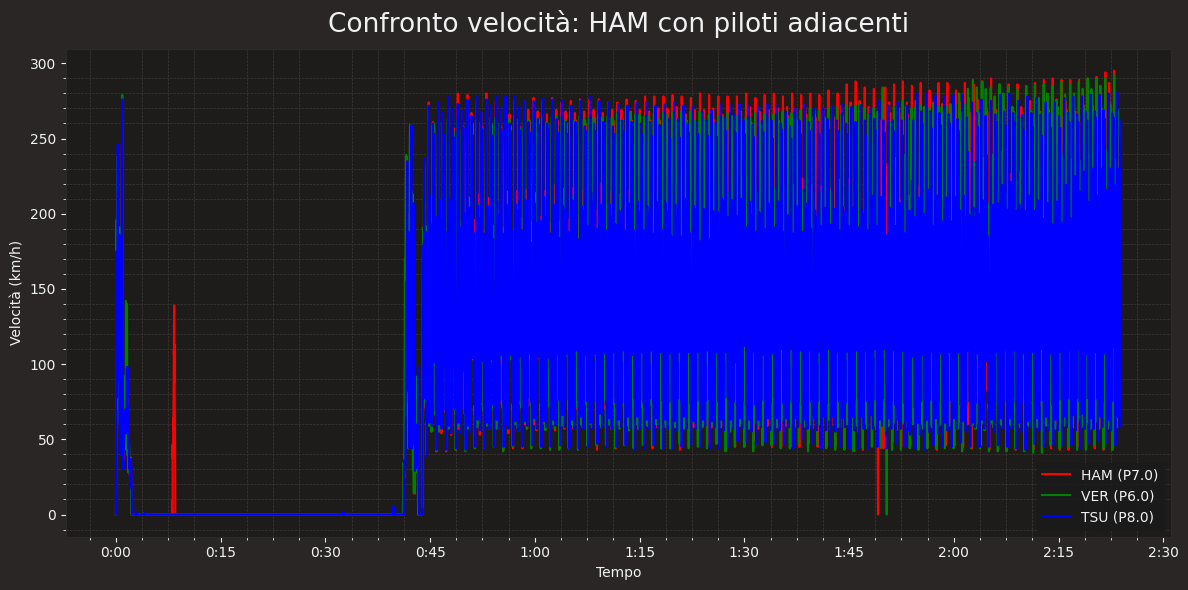

In [1]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps
import pandas as pd
import matplotlib.pyplot as plt

# Configurazione iniziale
fastf1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati
fastf1.plotting.setup_mpl()

def get_adjacent_drivers_times(year, event_name, session_type, driver_code):
    """
    Ottiene i tempi dei piloti adiacenti a un pilota specifico in una sessione.
    
    Args:
        year (int): Anno della gara
        event_name (str): Nome dell'evento (es. 'Monza')
        session_type (str): Tipo di sessione (es. 'Race', 'Qualifying')
        driver_code (str): Codice del pilota (es. 'HAM')
    
    Returns:
        dict: Dizionario con i dati dei piloti adiacenti
    """
    # Carica la sessione
    session = fastf1.get_session(year, event_name, session_type)
    session.load()
    
    # Ottieni i risultati della gara
    results = session.results
    results = results[['Position', 'Abbreviation', 'Time']].sort_values('Position')
    
    # Trova la posizione del pilota specificato
    driver_pos = results[results['Abbreviation'] == driver_code]['Position'].values[0]
    
    # Trova i piloti adiacenti
    ahead_driver = results[results['Position'] == driver_pos - 1]
    behind_driver = results[results['Position'] == driver_pos + 1]
    
    # Ottieni i tempi dei giri per tutti i piloti
    laps = session.laps
    
    # Filtra i giri dei piloti interessati
    driver_laps = laps.pick_driver(driver_code).get_telemetry()
    ahead_laps = laps.pick_driver(ahead_driver['Abbreviation'].values[0]).get_telemetry() if not ahead_driver.empty else None
    behind_laps = laps.pick_driver(behind_driver['Abbreviation'].values[0]).get_telemetry() if not behind_driver.empty else None
    
    return {
        'target_driver': {
            'code': driver_code,
            'position': driver_pos,
            'telemetry': driver_laps
        },
        'ahead_driver': {
            'code': ahead_driver['Abbreviation'].values[0] if not ahead_driver.empty else None,
            'position': driver_pos - 1 if not ahead_driver.empty else None,
            'telemetry': ahead_laps
        },
        'behind_driver': {
            'code': behind_driver['Abbreviation'].values[0] if not behind_driver.empty else None,
            'position': driver_pos + 1 if not behind_driver.empty else None,
            'telemetry': behind_laps
        }
    }

def plot_adjacent_drivers_times(data):
    """
    Crea un grafico con i tempi dei piloti adiacenti.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot del pilota target
    if data['target_driver']['telemetry'] is not None:
        ax.plot(data['target_driver']['telemetry']['Time'], 
                data['target_driver']['telemetry']['Speed'],
                label=f"{data['target_driver']['code']} (P{data['target_driver']['position']})",
                color='red')
    
    # Plot del pilota davanti
    if data['ahead_driver']['telemetry'] is not None:
        ax.plot(data['ahead_driver']['telemetry']['Time'], 
                data['ahead_driver']['telemetry']['Speed'],
                label=f"{data['ahead_driver']['code']} (P{data['ahead_driver']['position']})",
                color='green')
    
    # Plot del pilota dietro
    if data['behind_driver']['telemetry'] is not None:
        ax.plot(data['behind_driver']['telemetry']['Time'], 
                data['behind_driver']['telemetry']['Speed'],
                label=f"{data['behind_driver']['code']} (P{data['behind_driver']['position']})",
                color='blue')
    
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Velocità (km/h)')
    ax.set_title(f"Confronto velocità: {data['target_driver']['code']} con piloti adiacenti")
    ax.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Esempio di utilizzo
if __name__ == "__main__":
    # Specifica gara e pilota
    year = 2024
    event_name = "Monaco"
    session_type = "Race"
    driver_code = "HAM"  # Charles Leclerc
    
    # Ottieni i dati
    data = get_adjacent_drivers_times(year, event_name, session_type, driver_code)
    
    # Stampa informazioni
    print(f"Pilota analizzato: {data['target_driver']['code']} (P{data['target_driver']['position']})")
    if data['ahead_driver']['code']:
        print(f"Pilota davanti: {data['ahead_driver']['code']} (P{data['ahead_driver']['position']})")
    else:
        print("Nessun pilota davanti (primo in classifica)")
    
    if data['behind_driver']['code']:
        print(f"Pilota dietro: {data['behind_driver']['code']} (P{data['behind_driver']['position']})")
    else:
        print("Nessun pilota dietro (ultimo in classifica)")
    
    # Mostra il grafico
    plot_adjacent_drivers_times(data)